In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
path = '..\\DataSet\\fer2013\\'

In [9]:
x = pd.read_csv(path + 'fer2013.csv')
print (x.values.shape)

(35887, 3)


In [10]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [11]:
data = x.values
print (data.shape)
print (data[0, 0])

(35887, 3)
0


In [12]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
8287
3


In [13]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [15]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [16]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [17]:
X.shape

(35887, 2304)

In [18]:
x = X

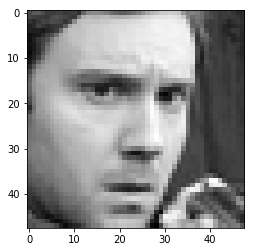

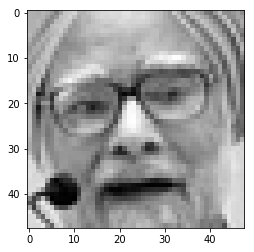

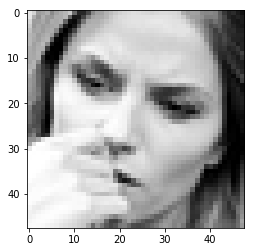

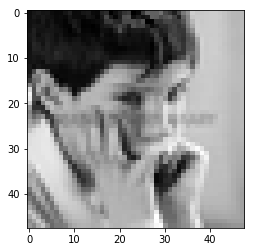

In [19]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [20]:
x = x / 255

In [21]:
x

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [22]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print (X_train.shape, Y_train.shape)
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [23]:
X_train = X_train.reshape((X_train.shape[0], 1 , 48, 48 ))
X_crossval = X_crossval.reshape((X_crossval.shape[0], 1 ,48, 48))

In [24]:
X_train.shape

(28710, 1, 48, 48)

In [25]:
print (y.shape)
y_ = np_utils.to_categorical(y, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [26]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 1, 48, 48) (3590, 7)


In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

d:\software\anaconda3\lib\site-packages\keras_preprocessing\image.py:1183: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (28710, 1, 48, 48) (48 channels).
  ' channels).')


In [28]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

d:\software\anaconda3\lib\site-packages\keras\callbacks.py:999: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [29]:
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [30]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(1,48,48)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.4))
model.add(Dense(7 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 48, 48)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 48, 48)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 24, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 24, 24)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 24, 24)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 12, 12)        55392     
__________

In [31]:
batch_size = 128
epochs = 14

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [32]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 2)

d:\software\anaconda3\lib\site-packages\keras_preprocessing\image.py:1404: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (28710, 1, 48, 48) (48 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/14
 - 1736s - loss: 0.4084 - acc: 0.8544 - val_loss: 0.3883 - val_acc: 0.8571
Epoch 2/14
 - 1749s - loss: 0.3859 - acc: 0.8572 - val_loss: 0.3628 - val_acc: 0.8604
Epoch 3/14
 - 1749s - loss: 0.3479 - acc: 0.8676 - val_loss: 0.3078 - val_acc: 0.8792
Epoch 4/14
 - 1766s - loss: 0.3027 - acc: 0.8812 - val_loss: 0.2866 - val_acc: 0.8840
Epoch 5/14
 - 1749s - loss: 0.2810 - acc: 0.8879 - val_loss: 0.2727 - val_acc: 0.8904
Epoch 6/14
 - 1770s - loss: 0.2659 - acc: 0.8929 - val_loss: 0.2644 - val_acc: 0.8918
Epoch 7/14
 - 1755s - loss: 0.2533 - acc: 0.8979 - val_loss: 0.2566 - val_acc: 0.8948
Epoch 8/14
 - 1763s - loss: 0.2425 - acc: 0.9022 - val_loss: 0.2513 - val_acc: 0.8971
Epoch 9/14
 - 1769s - loss: 0.2291 - acc: 0.9075 - val_loss: 0.2499 - val_acc: 0.8998
Epoch 10/14
 - 1764s - loss: 0.2198 - acc: 0.9108 - val_loss: 0.2504 - val_acc: 0.8993

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 11/14
 - 1779s - loss: 0.1953 - acc: 0.9220 - val_l

In [33]:
weights = model.get_weights()

In [34]:
np.save('my_model_weights', weights)

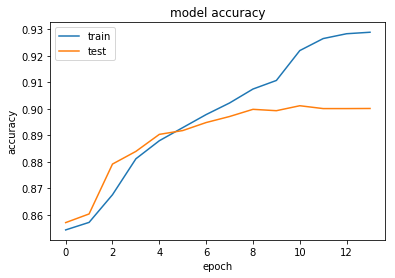

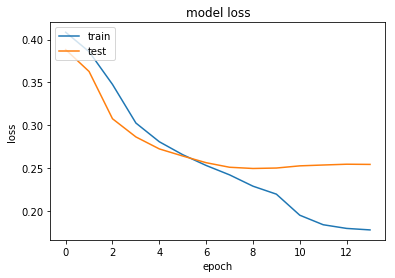

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
print (y_.shape)

(35887, 7)


In [40]:
Y_test = y_[32300:]
print (Y_test.shape)

(3587, 7)


In [41]:
X_test = x[32300:, :]
print(X_test.shape)

(3587, 2304)


In [42]:
X_test = X_test.reshape((X_test.shape[0], 1 , 48, 48 ))

In [43]:
print(X_test.shape)

(3587, 1, 48, 48)


In [44]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])


3587/3587 [==============================] - 156s 44ms/step
Test loss: 0.24864604312262895
Test accuracy: 90.22661394018763


In [46]:
from IPython.display import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [49]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

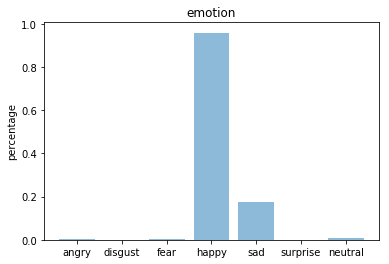

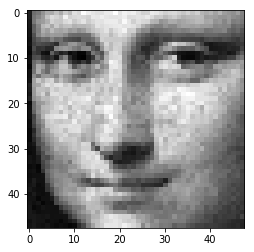

In [50]:
img = image.load_img("monalisa.png", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

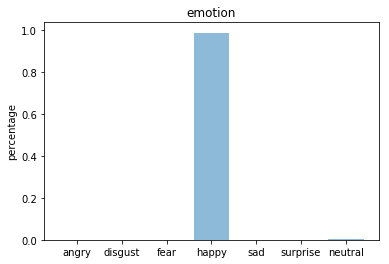

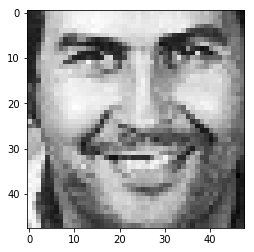

In [51]:

img = image.load_img("pablo.png", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

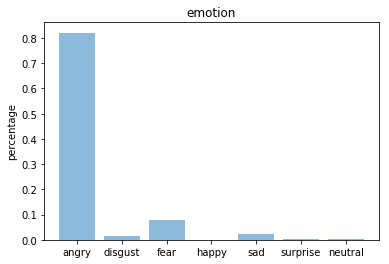

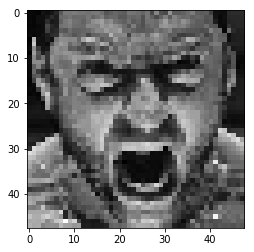

In [52]:

img = image.load_img("jackman.png", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

In [54]:
from keras.models import model_from_json

In [55]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [57]:
pip install h5py


The following command must be run outside of the IPython shell:

    $ pip install h5py

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [58]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [59]:
from keras.models import model_from_yaml

In [60]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)